### Name: Sohan Rudra
### Roll No: 16MA20054

In [20]:
#library imports
import math
from collections import namedtuple
from fractions import Fraction 
from copy import copy
import numpy as np
from numpy.linalg import inv
from sympy import symbols
import matplotlib.pyplot as plt

In [21]:
#some boilerplate code
x = symbols('x')
#Equation = namedtuple('Equation',('a','b'))
Conditions = namedtuple('Conditions',('n','f0','F0','Fn','h','e'))

In [22]:
%%latex
\begin{align}
f''' - ff' + 1 - f' = 0\\
f_0 = 0\\
f'_0 = 0\\
f'_n = 1\\
n = 10\\
\end{align}

<IPython.core.display.Latex object>

In [23]:
def initializer(cond):
    Vals = np.zeros((2, cond.n + 1))
    #Vals[0] = np.arange()
    Vals[1][-1] = cond.Fn
    return Vals

In [30]:
def Finite_Diff_Solver(cond, f_k, verbose=True):
    n = cond.n
    a, b, c, d = np.zeros((n-2, 2, 2)), np.zeros((n-1, 2, 2)),\
    np.zeros((n-2, 2, 2)), np.zeros((n-1, 2))
    #A
    b[0] = np.array([[1.0, -cond.h/2.0], [-f_k[1][1],\
                                          (-2.0/cond.h**2 - f_k[0][1] - 1.0)]])
    c[0] = np.array([[0.0, 0.0], [0.0, 1.0/cond.h**2]])
    b[n-2] = np.array([[1.0, -cond.h/2.0], [-f_k[1][-2],\
                                          (-2.0/cond.h**2 - f_k[0][-2] - 1.0)]])
    a[n-3] = np.array([[-1.0, -cond.h/2.0], [0.0, 1.0/cond.h**2]])
    #d
    d[0] = np.array([0.0, -1.0 - f_k[0][1]*f_k[1][1]])
    d[n-2] = np.array([0.0, -1.0 - f_k[0][-2]*f_k[1][-2] - 1.0/cond.h**2])
    for i, xi in enumerate(np.arange(1, cond.n-2), start=1):
        #print(i)
        a[i-1] = np.array([[-1.0, -cond.h/2.0], [0.0, 1.0/cond.h**2]])
        b[i] = np.array([[1.0, -cond.h/2.0], [-f_k[1][i+1],\
                                          (-2.0/cond.h**2 - f_k[0][i+1] - 1.0)]])
        c[i] = np.array([[0.0, 0.0], [0.0, 1/cond.h**2]])
        d[i] = np.array([0.0, -1.0 - f_k[0][i+1]*f_k[1][i+1]])
        
    if verbose:
        print("A={}, B={}, C={}, D={}".format(a,b,c,d))
        
    return (a,b,c,d)

In [56]:
def Thomas_Algorithm(coeff, cond):
    a, b, c, d = coeff
    n = cond.n
    c1 = np.zeros((n-2, 2, 2))
    d1 = np.zeros((n-1, 2))
    #print(b[0])
    c1[0] = inv(b[0]).dot(c[0])
    d1[0] = inv(b[0]).dot(d[0])
    #print(d1.shape)
    for i in range(1,n-2):
        t1 = b[i]-a[i-1].dot(c1[i-1])
        c1[i] = inv(t1).dot(c[i])
        d1[i] = inv(t1).dot(d[i] - a[i-1].dot(d1[i-1]))
    d1[n-2] = inv(b[n-2] - a[n-3].dot(c1[n - 3])).dot(d[n-2] - a[n-3].dot(d1[n-3]))
    def backsubstitution(c,d):
        y = np.zeros_like(d)
        y[-1] = d[-1]
        cache = y[-1]
        #print(cache.shape)
        for i in reversed(range(d.shape[0]-1)):
            y[i] = d[i] - c[i].dot(cache)
            cache = y[i]
        return y
    fin_y = backsubstitution(c1,d1)
    #print(fin_y.shape)
    Fn = cond.Fn
    fn = cond.h/2.0 * (fin_y.T[1][-1] + Fn) + fin_y.T[0][-1]
    y = np.concatenate((fin_y, np.array([[fn, Fn]])))
    y = np.concatenate((np.array([[cond.f0, cond.F0]]), y))
    #print(y)
    return y.T

In [57]:
def Newton_Solver(cond):
    print(cond.n)
    #print(initializer(cond))
    y_k = initializer(cond)
    tuples_coeff = Finite_Diff_Solver(cond, y_k, verbose=False)
    y_k1 = Thomas_Algorithm(tuples_coeff, cond)
    s = np.max(abs(y_k1[0] - y_k[0]))
    y_k = y_k1
    solutions = []
    while(s > cond.e):
        y_k = copy(y_k1)
        solutions.append(y_k)
        tuples_coeff = Finite_Diff_Solver(cond, y_k, verbose=False)
        y_k1 = Thomas_Algorithm(tuples_coeff, cond)
        s = np.max(abs(y_k1[0] - y_k[0]))
        #print(s)
        
    y_k = y_k1
    solutions.append(y_k)
    return solutions

In [58]:
cond = Conditions(100,0.0,0.0,1.0,0.1,0.001)

In [59]:
y = Newton_Solver(cond)
y[-1]

100


array([[ 0.        ,  0.0040059 ,  0.01556383,  0.03379069,  0.05787354,
         0.08706457,  0.1206772 ,  0.15808281,  0.19870792,  0.24203155,
         0.28758267,  0.33493766,  0.38371763,  0.43358584,  0.48424485,
         0.53543383,  0.5869257 ,  0.63852437,  0.69006198,  0.74139625,
         0.79240791,  0.84299823,  0.89308673,  0.94260903,  0.99151481,
         1.03976599,  1.08733508,  1.1342036 ,  1.18036075,  1.22580218,
         1.27052894,  1.31454647,  1.35786382,  1.40049288,  1.44244782,
         1.48374448,  1.52439997,  1.56443227,  1.60385992,  1.64270172,
         1.68097654,  1.71870314,  1.75590003,  1.79258536,  1.82877681,
         1.86449157,  1.89974627,  1.93455695,  1.96893905,  2.00290741,
         2.03647626,  2.06965925,  2.10246944,  2.13491934,  2.16702095,
         2.19878574,  2.23022474,  2.26134852,  2.29216728,  2.32269084,
         2.35292873,  2.3828902 ,  2.41258433,  2.44202001,  2.47120607,
         2.50015136,  2.52886478,  2.55735546,  2.5

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


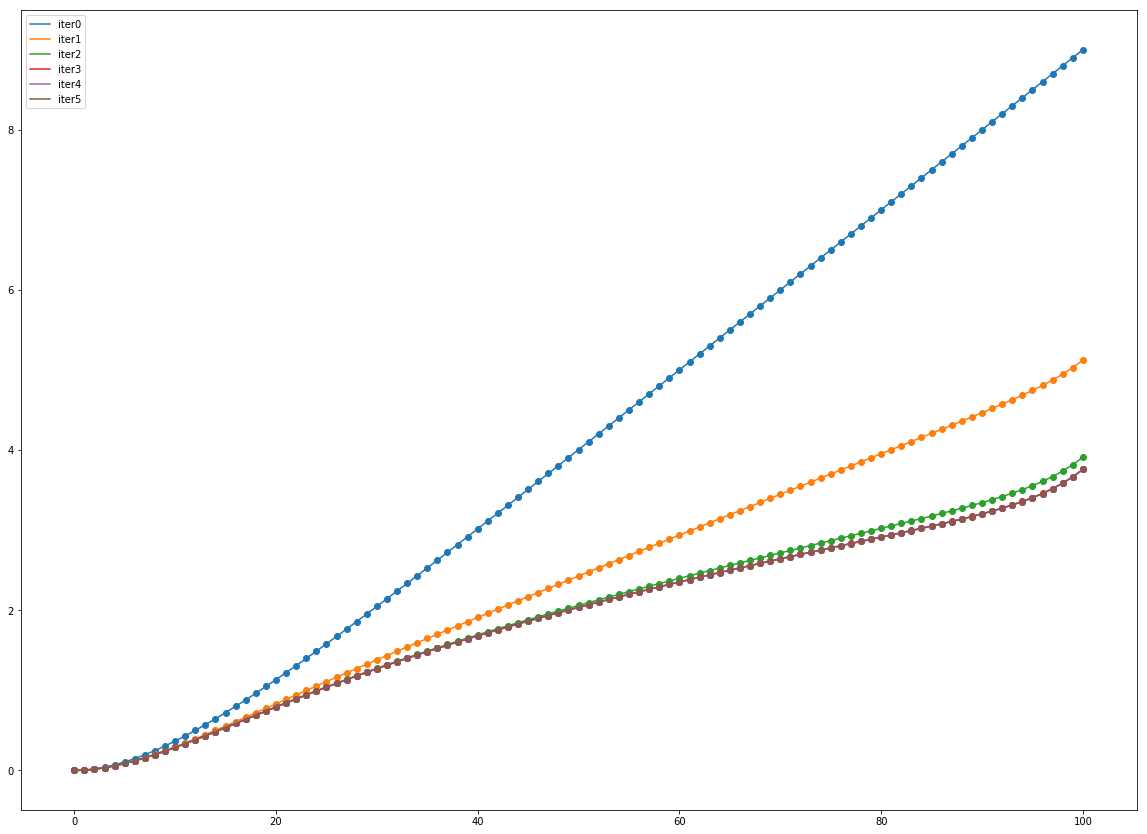

In [45]:
x_range = np.arange(0, cond.n + 1)
fig = plt.figure(figsize=(20, 50))
ax = fig.add_subplot(311)
g = []
for i in range(len(y)):
    ax.plot(x_range, y[i][0])
    ax.scatter(x_range, y[i][0])
    g.append("iter"+str(i))
ax.legend(tuple(g))
fig.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


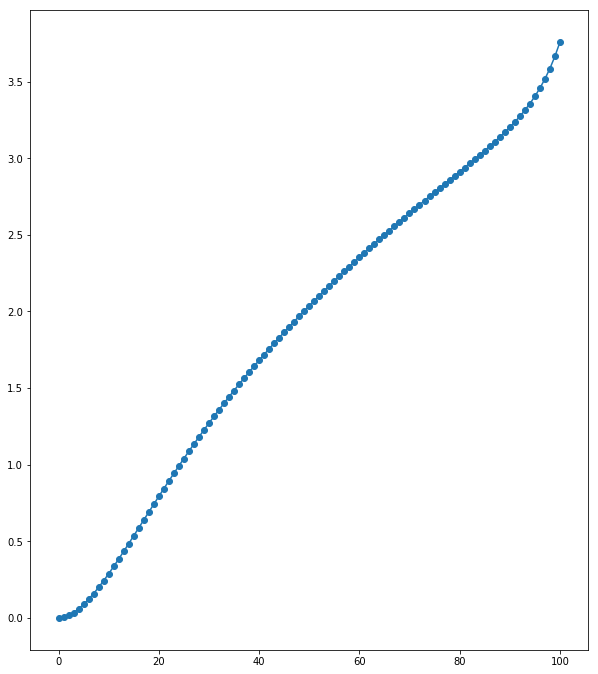

In [46]:
fig = plt.figure(figsize=(10,40))
x_range = np.arange(0, cond.n + 1)
ax = fig.add_subplot(311)
ax.plot(x_range, y[-1][0])
ax.scatter(x_range, y[-1][0])
fig.show()